load and prepare datasets from keras


In [1]:
import tensorflow as tf

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
dir(tf.config.get_visible_devices)

['LogicalDevice',
 'LogicalDeviceConfiguration',
 'PhysicalDevice',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental',
 'experimental_connect_to_cluster',
 'experimental_connect_to_host',
 'experimental_functions_run_eagerly',
 'experimental_run_functions_eagerly',
 'get_logical_device_configuration',
 'get_soft_device_placement',
 'get_visible_devices',
 'list_logical_devices',
 'list_physical_devices',
 'optimizer',
 'set_logical_device_configuration',
 'set_soft_device_placement',
 'set_visible_devices',
 'threading']

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [21]:
help(tf.keras)

Help on package tensorflow.keras in tensorflow:

NAME
    tensorflow.keras - Implementation of the Keras API meant to be a high-level API for TensorFlow.

DESCRIPTION
    Detailed documentation and user guides are available at
    [tensorflow.org](https://www.tensorflow.org/guide/keras).

PACKAGE CONTENTS
    activations (package)
    applications (package)
    backend (package)
    callbacks (package)
    constraints (package)
    datasets (package)
    estimator (package)
    experimental (package)
    initializers (package)
    layers (package)
    losses (package)
    metrics (package)
    mixed_precision (package)
    models (package)
    optimizers (package)
    premade (package)
    preprocessing (package)
    regularizers (package)
    utils (package)
    wrappers (package)

VERSION
    2.3.0-tf

FILE
    /usr/lib/python3.8/site-packages/tensorflow/keras/__init__.py




In [2]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [16]:
len(tf.config.experimental.list_physical_devices('GPU'))

0

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist

%matplotlib inline

import os


In [5]:
# load dataset to Variable in RAM, don't write to disk
(image_train, label_train), (image_test, label_test) = mnist.load_data()

In [6]:
def draw_digit(digit):
    plt.figure(figsize=(10,1))
    label_train_index_0 = []
    for label_train_index in range(500):
        if label_train[label_train_index] == digit:
            label_train_index_0 = label_train_index_0 + [label_train_index]
        if len(label_train_index_0) == 10:
            break
    for label_train_index_0_index in range(len(label_train_index_0)):
        plt.subplot(1, len(label_train_index_0), label_train_index_0_index+1)
        plt.imshow(image_train[label_train_index_0[label_train_index_0_index]], cmap='gray')
        plt.axis("off")
    print(label_train_index_0)
    plt.show()


[1, 21, 34, 37, 51, 56, 63, 68, 69, 75]


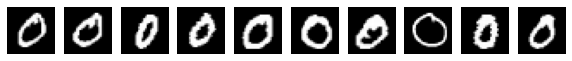

[3, 6, 8, 14, 23, 24, 40, 59, 67, 70]


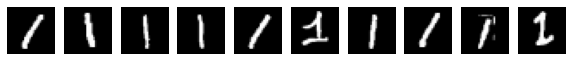

[5, 16, 25, 28, 76, 82, 109, 117, 120, 122]


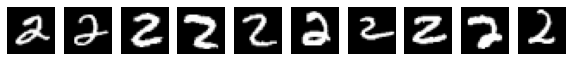

[7, 10, 12, 27, 30, 44, 49, 50, 74, 86]


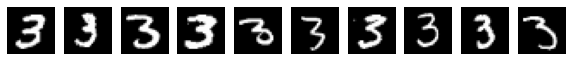

[2, 9, 20, 26, 53, 58, 60, 61, 64, 89]


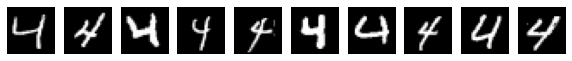

[0, 11, 35, 47, 65, 100, 132, 138, 145, 173]


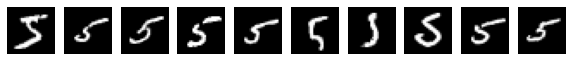

[13, 18, 32, 36, 39, 62, 66, 73, 83, 90]


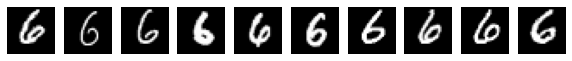

[15, 29, 38, 42, 52, 71, 79, 84, 91, 96]


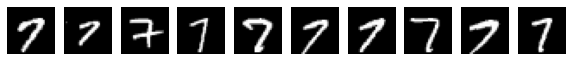

[17, 31, 41, 46, 55, 85, 94, 97, 125, 137]


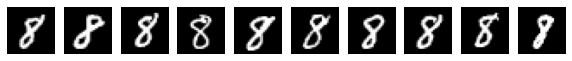

[4, 19, 22, 33, 43, 45, 48, 54, 57, 80]


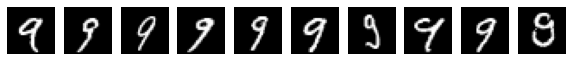

In [7]:
for digit in range(10):
    draw_digit(digit)


In [8]:
from tensorflow.keras.models import Sequential
# list of layers

In [9]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers



In [10]:
batch_size, img_rows, img_cols = 64, 28, 28
image_train = image_train.reshape(image_train.shape[0], img_rows, img_cols, 1)
image_test = image_test.reshape(image_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [11]:
image_train = image_train.astype("float32")
image_test = image_test.astype("float32")
image_train /= 255
image_test /= 255 

In [12]:
label_train = to_categorical(label_train, 10)
label_test = to_categorical(label_test, 10)

model = Sequential()

model.add(Convolution2D(28, 3, 3, padding="same", input_shape=input_shape))
model.add(Activation("elu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))
model.add(Convolution2D(64, 5, 5, padding="same", input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))


In [13]:
# Dense layer = fully connected layer

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))



### Optimizers:
- sgd
- rmsprop
- adagrad
- adadelta
- adam
- adamax
- nadam

### Losses
- binary_croossentropy 
- mean_squared_error
- mean_absolute_error
- mean_absolute_percentage_error
- mean_squared_logarithmic_error
- kullback_leibler_divergence
- categorical_crossentropy
- categorical_hinge
- cosine
- cosine_proximity
- cosine_similarity
- deserialize
- get
- hinge
- logcosh
- poisson
- serialize
- sparse_categorical_crossentrope
- squared_hinge


In [15]:
model.compile(loss="categorical_crossentropy", 
              optimizer=optimizers.SGD(lr=0.001), 
              metrics=["accuracy"])

model.fit(image_train, 
          label_train, 
          batch_size=batch_size, 
          epochs=50, 
          verbose=1, 
          validation_data=(image_test, label_test))

score = model.evaluate(image_test, label_test, verbose=0)
print("Test score: %f" % score[0])
print("Test accuracy: %f" % score[1])



Epoch 1/50
938/938 [==============================] - 2s 3ms/step - loss: 0.7791 - accuracy: 0.7436 - val_loss: 0.6994 - val_accuracy: 0.7786
Epoch 2/50
938/938 [==============================] - 2s 2ms/step - loss: 0.7563 - accuracy: 0.7523 - val_loss: 0.6786 - val_accuracy: 0.7849
Epoch 3/50
938/938 [==============================] - 2s 2ms/step - loss: 0.7358 - accuracy: 0.7582 - val_loss: 0.6573 - val_accuracy: 0.7955
Epoch 4/50
938/938 [==============================] - 2s 2ms/step - loss: 0.7148 - accuracy: 0.7658 - val_loss: 0.6394 - val_accuracy: 0.8009
Epoch 5/50
938/938 [==============================] - 2s 2ms/step - loss: 0.6937 - accuracy: 0.7739 - val_loss: 0.6197 - val_accuracy: 0.8065
Epoch 6/50
938/938 [==============================] - 2s 2ms/step - loss: 0.6752 - accuracy: 0.7813 - val_loss: 0.6025 - val_accuracy: 0.8122
Epoch 7/50
938/938 [==============================] - 2s 2ms/step - loss: 0.6572 - accuracy: 0.7875 - val_loss: 0.5830 - val_accuracy: 0.8183
Epoch 